# 1D Diffusion Simulation

In [1]:
import matplotlib.pyplot as plt
import random

N: population \
Pop: positions of the population (Pop is an array of length N recording the position of every individual) \
L: number of intervals (we devide the 1D space into L intervals) \
T: total timestamps \
PlotPerT: display the distribution plot every PlotPerT \
D: density (D is an array of length L where $D[i]$ shows the population in interval i) 

In [2]:
N = 10000
L =  21 # For convenience, the initial state is all the population stay in the middle interval
Pop = [L//2 for i in range(N)]
T = 500
PlotPerT = 100

In [3]:
# Plot the current density
def DensityPlot(D):
    plt.bar(range(len(D)),D)
    plt.show()
    return

In [4]:
# Boundary Check Functions

# the leftmost go left is the rightmost, the rightmost go right is the leftmost
def periodic_boundary(pos, L):
    if pos<0:
        return L-1
    elif pos == L:
        return 0
    return pos

# the leftmost go left or the rightmost go right => stay at the boundary for this timestamp
def reflective_boundary(pos, L):
    if pos<0:
        return 0
    elif pos == L:
        return L-1
    return pos

In [5]:
# Monte Carlo Simulation of the random motion of individuals
# Input: current positions
# Output: the new positions at the next timestamp
def RandomWalk(Pop, L):
    for i in range(len(Pop)):
        rand_move = random.random()
        # Left
        if rand_move < 0.25:
            Pop[i] -= 1
        # Right
        elif rand_move < 0.5:
            Pop[i] += 1
        # Stay
        else:
            Pop[i] += 0
        Pop[i] = periodic_boundary(Pop[i], L)
    return Pop   

In [6]:
def DiffusionSimulation(L, Pop, T, PlotPerT):
    for t in range(T):
        # For every time stamp, we first calculate the current density
        D = [0 for i in range(L)]
        for x in Pop:
            D[x] += 1
        # Plot the distribution
        if t in range(10) or t%PlotPerT == 0:
            print('Timestamp:',t)
            DensityPlot(D)
        # Perform random movement
        Pop = RandomWalk(Pop, L) 
        
    print('Timestamp:', T)
    DensityPlot(D)

Timestamp: 0


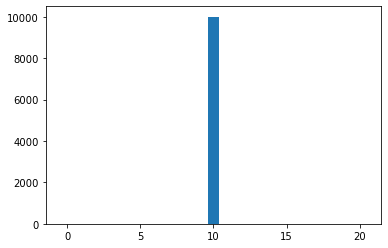

Timestamp: 1


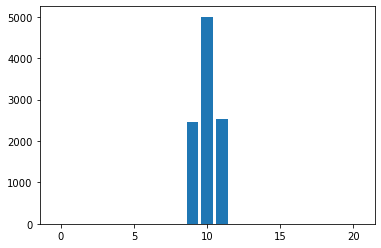

Timestamp: 2


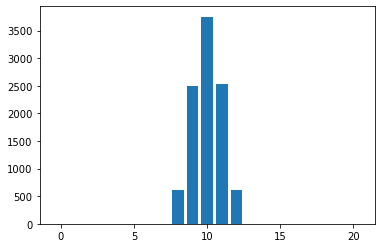

Timestamp: 3


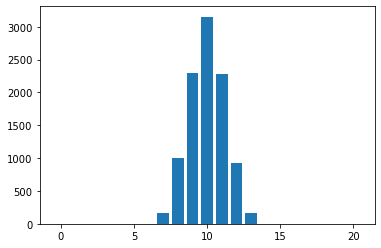

Timestamp: 4


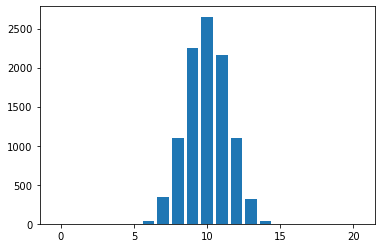

Timestamp: 5


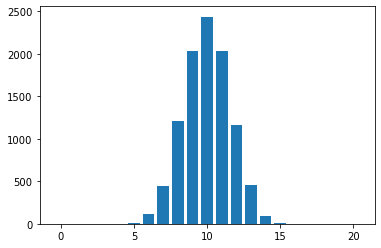

Timestamp: 6


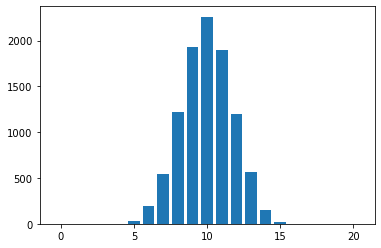

Timestamp: 7


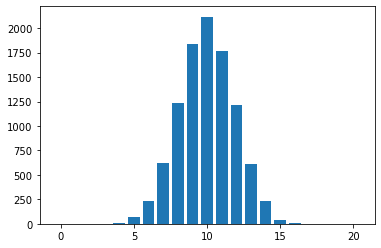

Timestamp: 8


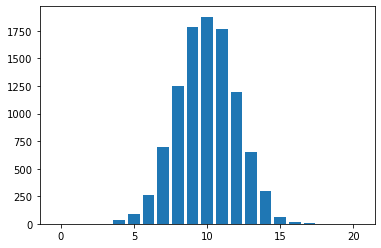

Timestamp: 9


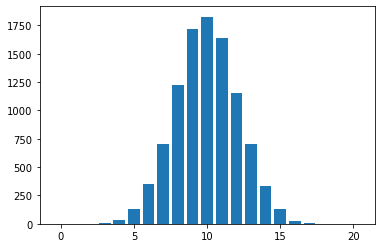

Timestamp: 100


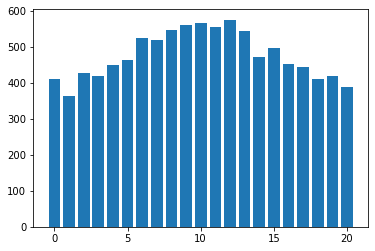

Timestamp: 200


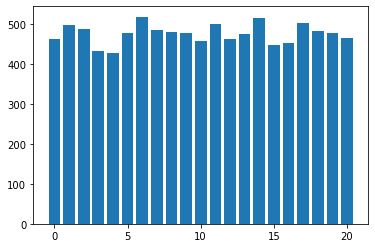

Timestamp: 300


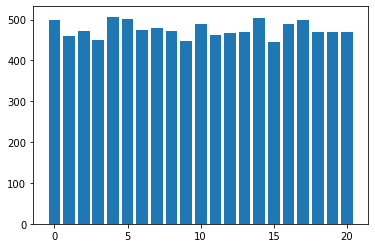

Timestamp: 400


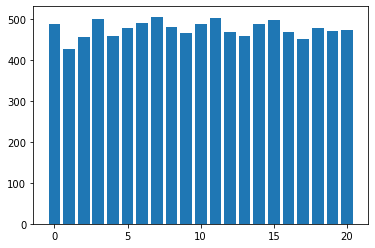

Timestamp: 500


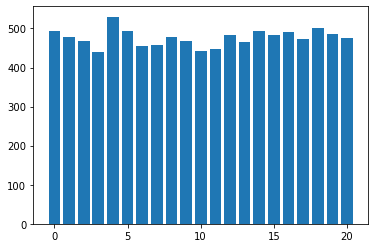

In [7]:
DiffusionSimulation(L, Pop, T, PlotPerT)